# Binary Classification with a Bank Churn Dataset

Hedefimiz, bir müşterinin hesabına devam edip etmeyeceğini veya hesabını kapatıp kapatmayacağını (örneğin, churns) tahmin etmektir

<img src="https://img.paratic.com/dosya/2016/09/turkiyede-en-fazla-subeye-sahip-olan-10-banka.jpg">

<a href="https://www.kaggle.com/competitions/playground-series-s4e1/data">Dataya Buradan Erişebilirsiniz</a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",100)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [4]:
df.shape

(165034, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

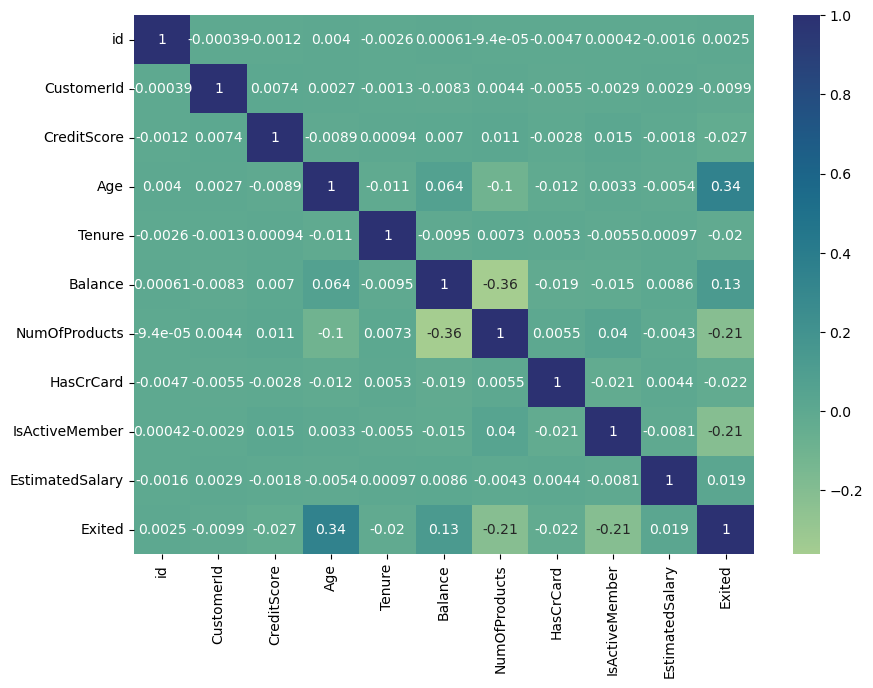

In [7]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap="crest");

In [8]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


<Axes: xlabel='Exited', ylabel='count'>

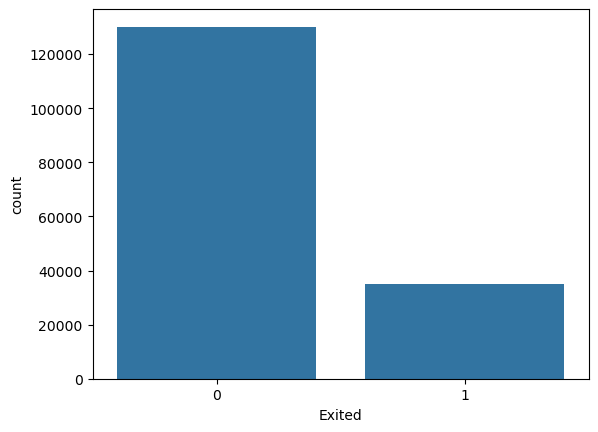

In [9]:
sns.countplot(x=df["Exited"])

In [10]:
df["Geography"].value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [11]:
d={"Male":1,"Female":0}

In [12]:
df["Gender"]=df["Gender"].map(d)

In [13]:
d={"France":0,"Spain":1,"Germany":2}

In [14]:
df["Geography"]=df["Geography"].map(d)

### Modelling

In [15]:
x=df.drop(["id","CustomerId","Surname","Exited"],axis=1)
y=df["Exited"]

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def algo_test_classification(X, y):
    # Bütün sınıflandırma modellerini tanımlıyorum
    lr = LogisticRegression()
    svc = SVC()
    knn = KNeighborsClassifier()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    gb = GradientBoostingClassifier()
    xgb = XGBClassifier()
    mlp = MLPClassifier()

    algos = [lr, svc, knn, dt, rf, gb, xgb, mlp]
    algo_names = ['Logistic Regression', 'SVC', 'KNN', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost', 'MLP']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    accuracy = []
    precision = []
    recall = []
    f1 = []

    # Sonuç tablosunu oluşturuyorum
    result = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1'], index=algo_names)

    for algo in algos:
        algo.fit(X_train, y_train)
        y_pred = algo.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))

    # Sonuçları result tablosuna ekliyorum
    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1'] = f1

    # Sonuçları doğruluk oranına göre sıralayıp döndürüyorum
    return result.sort_values('Accuracy', ascending=False)

In [17]:
algo_test_classification(x,y)

,Accuracy,Precision,Recall,F1
Gradient Boosting,0.866362,0.751185,0.546945,0.632998
XGBoost,0.865877,0.737148,0.564917,0.639642
Random Forest,0.859636,0.719970,0.546370,0.621270
MLP,0.806374,0.661883,0.165780,0.265149
Decision Tree,0.796710,0.516950,0.537168,0.526865
Logistic Regression,0.793195,0.530410,0.161754,0.247907
SVC,0.789287,0.000000,0.000000,0.000000
KNN,0.759203,0.308227,0.114738,0.167225


In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
gb = GradientBoostingClassifier()

In [21]:
mod=gb.fit(x_train,y_train)

In [22]:
thmn=gb.predict(x_test)

In [23]:
accuracy_score(y_test, thmn)

0.8663616808555761

<Axes: >

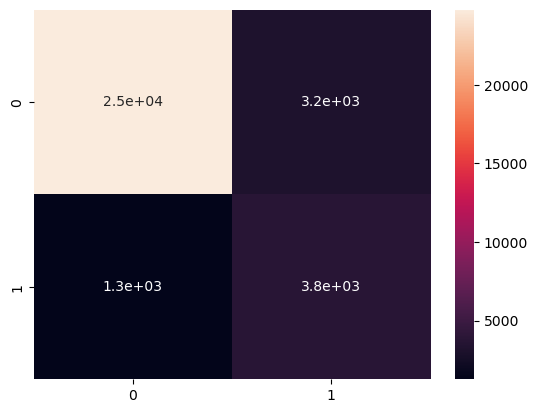

In [24]:
sns.heatmap(confusion_matrix(thmn,y_test),annot=True)

In [25]:
print(classification_report(thmn,y_test))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92     27943
           1       0.55      0.75      0.63      5064

    accuracy                           0.87     33007
   macro avg       0.75      0.82      0.78     33007
weighted avg       0.89      0.87      0.87     33007



In [26]:
import pickle

In [27]:
with open('bank.pkl', 'wb') as file:
    pickle.dump(gb, file)

Kaggle daki test dosyamızı yükleyip tahmin ettireceğiz.

In [28]:
test=pd.read_csv("test.csv")

In [29]:
dosya=pd.DataFrame()

In [30]:
dosya["id"]=test["id"]

In [31]:
test=test.drop(["id","CustomerId","Surname"],axis=1)

In [32]:
d={"Male":1,"Female":0}

In [33]:
test["Gender"]=test["Gender"].map(d)

In [34]:
d={"France":0,"Spain":1,"Germany":2}

In [35]:
test["Geography"]=test["Geography"].map(d)

In [36]:
dosya["Exited"]=gb.predict(test)

In [52]:
dosya.sample(26)

,id,Exited
10869,175903,0.0
33037,198071,0.0
65575,230609,0.0
83013,248047,0.0
17670,182704,0.0
21880,186914,0.0
89584,254618,0.0
97232,262266,0.0
51381,216415,0.0
58803,223837,0.0


In [38]:
dosya.to_csv("tahmin1.csv",index=False)

### Deep Learning

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [40]:
from sklearn.preprocessing import normalize, scale

In [41]:
model=Sequential()
model.add(Dense(120,activation="relu"))  # Modele layer ekliyor # Dense bütün nöronlar bütün nöronlara bağlansın demek
model.add(Dense(80,activation="relu")) # 120 nöron var 
model.add(Dense(64,activation="relu"))
model.add(Dense(30,activation="relu"))
model.add(Dense(20,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid")) # Binary classification olduğu için sigmoid kullandık ! Regression da yok
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=["accuracy"]) # Loss: hata MSE gibi # Optimizer=adam 

In [42]:
x=scale(x) # hepsini aynı birime getirdik

In [43]:
history=model.fit(x,y,epochs=75,batch_size=23, validation_split=.20, verbose=1)

Epoch 1/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 11s 1ms/step - accuracy: 0.8482 - loss: 0.3579 - val_accuracy: 0.8601 - val_loss: 0.3308
Epoch 2/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8634 - loss: 0.3269 - val_accuracy: 0.8627 - val_loss: 0.3281
Epoch 3/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8636 - loss: 0.3252 - val_accuracy: 0.8614 - val_loss: 0.3261
Epoch 4/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.8628 - loss: 0.3281 - val_accuracy: 0.8635 - val_loss: 0.3277
Epoch 5/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8645 - loss: 0.3239 - val_accuracy: 0.8633 - val_loss: 0.3263
Epoch 6/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8656 - loss: 0.3209 - val_accuracy: 0.8626 - val_loss: 0.3260
Epoch 7/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8643 - loss: 0.3222 - val_accuracy: 0.8629 - val_loss: 0.3257
Epoch 8/75
5741/5741 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8650 - loss: 0.3234 -

In [44]:
dosya["Exited"]=model.predict(test)

3439/3439 ━━━━━━━━━━━━━━━━━━━━ 3s 762us/step


In [45]:
dosya.to_csv("tahmin2.csv",index=False)

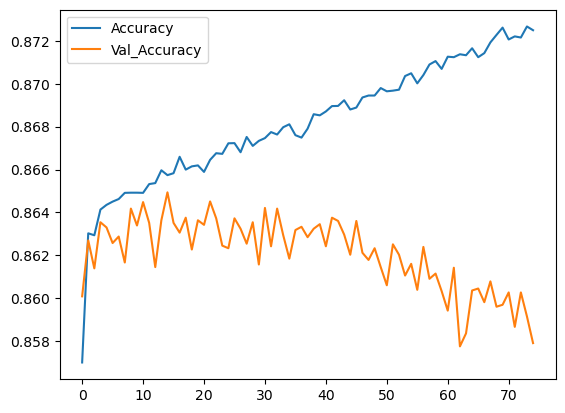

In [46]:
plt.plot(history.history["accuracy"],label="Accuracy")    
plt.plot(history.history["val_accuracy"],label="Val_Accuracy")
plt.legend()

Sonuc olarak hem ML hem de DL olarak modelimizi egittik ve Kaggle da test verilerimizi degerlendirdik.